In [4]:
import econpizza as ep
import matplotlib.pyplot as plt

In [34]:
model = ep.load('miu2.yaml',
                raise_errors=True,
                verbose=True)
_ = model.solve_stst()
model.steady_state
shk = ('ei', 0.01 )

x1, flag = model.find_path(shock=shk)

(load:) Loading cached model.
(solve_stst:) Steady state already known.


/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/parser/__init__.py:262: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  init_wf = jnp.array(None)
/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/solvers/stacking.py:83: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  dist0 = jnp.array(init_dist) if init_dist is not None else jnp.array(


    Iteration   1 | max error 6.67e-03 | lapsed 0.1951s
    Iteration   2 | max error 2.43e-17 | lapsed 0.1967s
(find_path:) Stacking done (0.199s). The solution converged.


In [35]:
model2 = ep.load('miu2.yaml',
                 raise_errors=True,
                 verbose=True)
model2['steady_state']['fixed_values']['sigma'] = 2
_ = model2.solve_stst()
model2.steady_state
shk = ('ei', 0.01 )

x2, flag = model2.find_path(shock=shk)

(load:) Loading cached model.
(solve_stst:) Steady state already known.
    Iteration   1 | max error 6.67e-03 | lapsed 0.1668s
    Iteration   2 | max error 2.51e-17 | lapsed 0.1682s
(find_path:) Stacking done (0.170s). The solution converged.


/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/parser/__init__.py:262: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  init_wf = jnp.array(None)
/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/solvers/stacking.py:83: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  dist0 = jnp.array(init_dist) if init_dist is not None else jnp.array(


In [36]:
model3 = ep.load('miu2.yaml', raise_errors=True, verbose=True)
model3['steady_state']['fixed_values']['nu'] = 2
_ = model3.solve_stst()
model3.steady_state
shk = ('ei', 0.01)

x3, flag = model3.find_path(shock=shk)

(load:) Loading cached model.
(solve_stst:) Steady state already known.


/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/parser/__init__.py:262: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  init_wf = jnp.array(None)
/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/solvers/stacking.py:83: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  dist0 = jnp.array(init_dist) if init_dist is not None else jnp.array(


    Iteration   1 | max error 6.67e-03 | lapsed 0.2384s
    Iteration   2 | max error 2.49e-17 | lapsed 0.2397s
(find_path:) Stacking done (0.244s). The solution converged.


In [37]:
x = [x1, x2, x3]

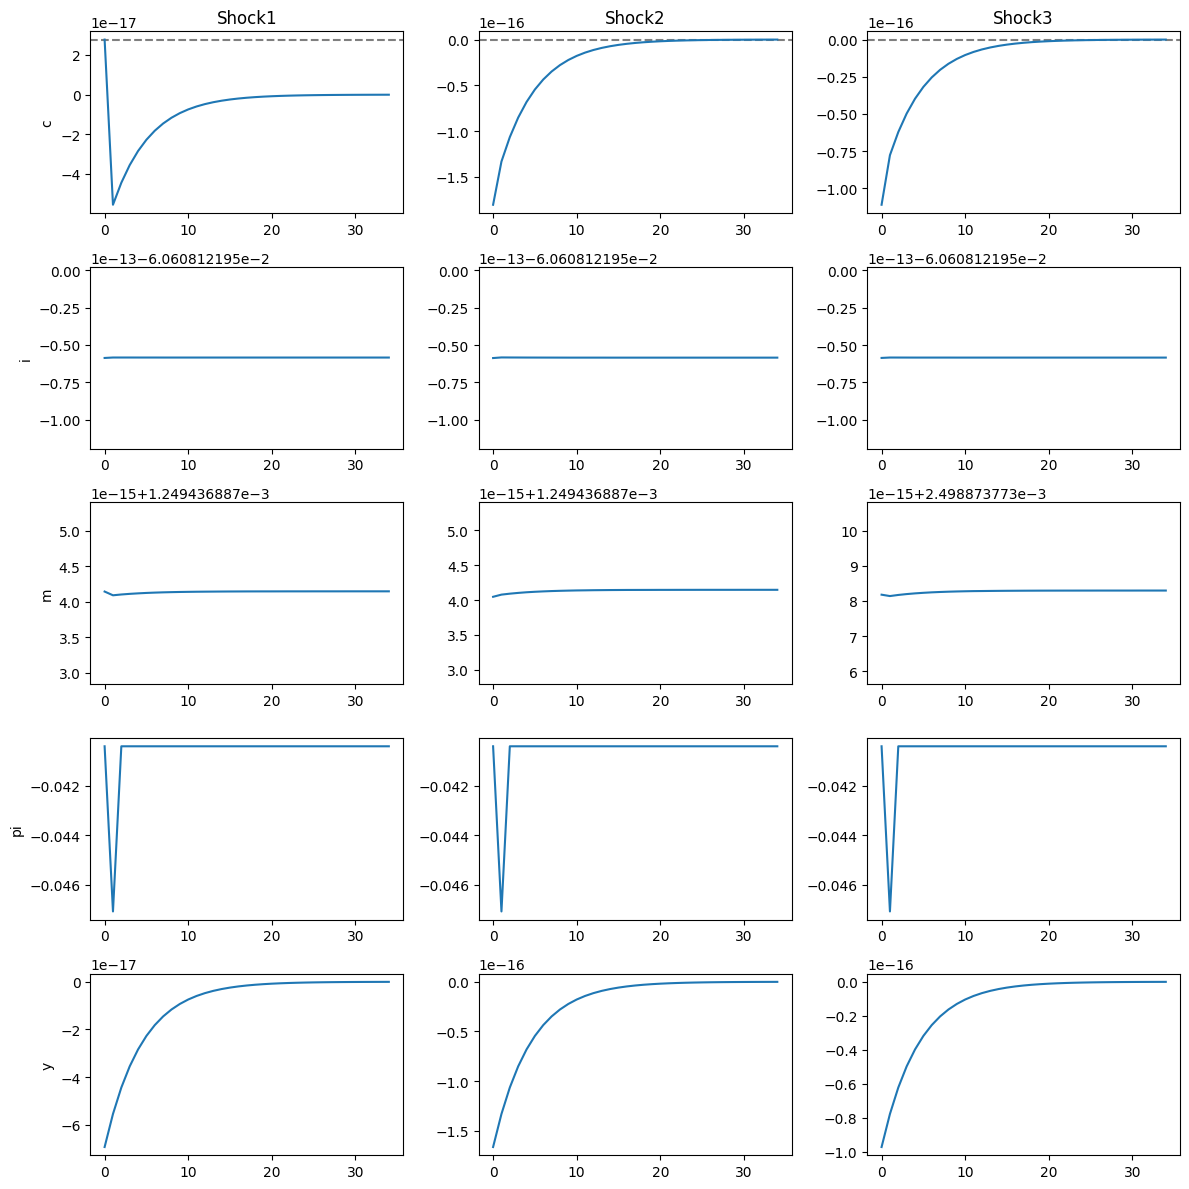

In [38]:
fig, axes = plt.subplots(5,
                         len(x),
                          figsize=(12, 12))

vars = ['c', 'i', 'm', 'pi', 'y']

for i, ax in enumerate(axes):
  var = vars[i]
  for idx, a in enumerate(ax):
    m = x[idx]
    if var == 'c':
      a.axhline(max(m[:35, i]),
                color='k',
                ls='--',
                alpha=0.5)
    if var == 'l':
      a.axhline(max(m[:35, i]), color='k',
                ls='--',
                alpha=0.5)
      a.axhline(0, color='r', ls='--', alpha=0.5)
    a.plot(m[:35, i])

    if i == 0:
      a.set_title(f'Shock{idx + 1}')
      

    if idx == 0:
      a.set_ylabel(var)
      

fig.tight_layout()